In [16]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import torch
import torch.nn as nn
from utils import *
from dataloaders.RealBlur import *
import matplotlib.pyplot as plt
from torchvision import transforms
import einops
from dataloaders.ColorizationDataset import ColorizationDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
dataset = ColorizationDataset(train=True, width=224, height=224, dataset_root ="/Users/sagarasanghavi/Desktop/Photos")

[[[0.47058824 0.4627451  0.44313726 ... 0.31764707 0.29411766 0.28627452]
  [0.46666667 0.4862745  0.45882353 ... 0.3019608  0.30588236 0.29803923]
  [0.47843137 0.49019608 0.4745098  ... 0.33333334 0.29411766 0.2784314 ]
  ...
  [0.40392157 0.41960785 0.44705883 ... 0.78431374 0.79607844 0.8235294 ]
  [0.39607844 0.4        0.4392157  ... 0.76862746 0.7764706  0.80784315]
  [0.39607844 0.4        0.40392157 ... 0.75686276 0.7647059  0.79607844]]

 [[0.50980395 0.5019608  0.4745098  ... 0.23921569 0.22352941 0.20784314]
  [0.5058824  0.5254902  0.49019608 ... 0.22352941 0.22745098 0.20784314]
  [0.5176471  0.5294118  0.5058824  ... 0.24705882 0.20784314 0.18431373]
  ...
  [0.49803922 0.50980395 0.52156866 ... 0.61960787 0.64705884 0.6745098 ]
  [0.49803922 0.49411765 0.52156866 ... 0.6039216  0.627451   0.65882355]
  [0.49803922 0.49411765 0.49411765 ... 0.5921569  0.6156863  0.64705884]]

 [[0.5137255  0.5058824  0.48235294 ... 0.20392157 0.18431373 0.17254902]
  [0.50980395 0.529411

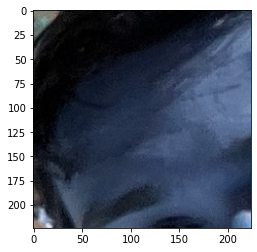

In [18]:
# sanity check
def show_image(img):
    plt.figure()
    plt.imshow(cv2.cvtColor(img.transpose((1, 2, 0)), cv2.COLOR_BGR2RGB))
    plt.show()

bw, gt = dataset[1]
print(gt)
show_image(gt)

In [19]:
from models.axialtransformer import *

blur, gt = dataset[0]

cropped_image = gt[None, :, :512, :512]
cropped_blur = blur[None, :, :512, :512]

cropped_image_torch = torch.from_numpy(cropped_image).float()
print(cropped_image_torch.shape)

conv1x1 = nn.Conv2d(3, 128, 1)
transformer = AxialImageTransformer(dim=128, depth=12, reversible=True)

out = transformer(conv1x1(cropped_image_torch))
print(out.shape)

torch.Size([1, 3, 224, 224])


RuntimeError: Given groups=1, weight of size [128, 3, 1, 1], expected input[1, 128, 224, 224] to have 3 channels, but got 128 channels instead

In [21]:
from models.unet import *

unet_model = UNet(n_channels=3, n_classes=20, bilinear=False)
unet_model()

TypeError: UNet.forward() missing 1 required positional argument: 'x'